In [4]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [5]:
# Define relative paths
BASE_DIR = os.path.dirname(os.path.abspath(__file__))
TRAIN_DIR = os.path.join(BASE_DIR, 'images', 'train')
VALIDATION_DIR = os.path.join(BASE_DIR, 'images', 'validation')

In [6]:
import os
import pandas as pd

def createdataframe(dir):
    image_paths = []
    labels = []
    if not os.path.exists(dir):
        raise FileNotFoundError(f"Directory '{dir}' not found.")
    for label in os.listdir(dir):
        label_dir = os.path.join(dir, label)
        if os.path.isdir(label_dir):
            for imagename in os.listdir(label_dir):
                image_paths.append(os.path.join(label_dir, imagename))
                labels.append(label)
            print(label, "completed")
        else:
            print(f"Skipping non-directory '{label}' in '{dir}'.")
    return image_paths, labels


In [7]:
# Check and create DataFrame for training images
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print(train)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed
                                                   image     label
0      /kaggle/input/face-expression-recognition-data...  surprise
1      /kaggle/input/face-expression-recognition-data...  surprise
2      /kaggle/input/face-expression-recognition-data...  surprise
3      /kaggle/input/face-expression-recognition-data...  surprise
4      /kaggle/input/face-expression-recognition-data...  surprise
...                                                  ...       ...
28816  /kaggle/input/face-expression-recognition-data...     happy
28817  /kaggle/input/face-expression-recognition-data...     happy
28818  /kaggle/input/face-expression-recognition-data...     happy
28819  /kaggle/input/face-expression-recognition-data...     happy
28820  /kaggle/input/face-expression-recognition-data...     happy

[28821 rows x 2 columns]


In [8]:
# Check and create DataFrame for test images
validation = pd.DataFrame()
validation['image'], validation['label'] = createdataframe(VALIDATION_DIR)
print(validation)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed
                                                  image     label
0     /kaggle/input/face-expression-recognition-data...  surprise
1     /kaggle/input/face-expression-recognition-data...  surprise
2     /kaggle/input/face-expression-recognition-data...  surprise
3     /kaggle/input/face-expression-recognition-data...  surprise
4     /kaggle/input/face-expression-recognition-data...  surprise
...                                                 ...       ...
7061  /kaggle/input/face-expression-recognition-data...     happy
7062  /kaggle/input/face-expression-recognition-data...     happy
7063  /kaggle/input/face-expression-recognition-data...     happy
7064  /kaggle/input/face-expression-recognition-data...     happy
7065  /kaggle/input/face-expression-recognition-data...     happy

[7066 rows x 2 columns]


In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [11]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
validation_features = extract_features(validation['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [14]:
x_train = train_features/255.0
x_test = validation_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
y_train = le.transform(train['label'])
y_test = le.transform(validation['label'])

In [18]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [19]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
  6/226 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.2014 - loss: 1.9464 

I0000 00:00:1711123916.223879      91 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


226/226 ━━━━━━━━━━━━━━━━━━━━ 32s 74ms/step - accuracy: 0.2359 - loss: 1.8412 - val_accuracy: 0.2583 - val_loss: 1.8151
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2239 - loss: 1.8303 - val_accuracy: 0.2566 - val_loss: 1.8121
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2504 - loss: 1.7954 - val_accuracy: 0.2934 - val_loss: 1.7166
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2871 - loss: 1.7358 - val_accuracy: 0.3208 - val_loss: 1.6781
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3018 - loss: 1.7032 - val_accuracy: 0.3491 - val_loss: 1.6303
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3216 - loss: 1.6705 - val_accuracy: 0.3295 - val_loss: 1.6566
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3567 - loss: 1.6160 - val_accuracy: 0.4278 - val_loss: 1.4537
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3906 - loss: 1.5555 - val_accurac

In [23]:
model_json = model.to_json()
with open('facialemotionmodel2.json','w') as json_file:
    json_file.write(model_json)
model.save('facialemotionmodel2.h5')

In [24]:
from keras.models import model_from_json

In [25]:
json_file = open('facialemotionmodel2.json', "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights('facialemotionmodel2.h5')

In [26]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [27]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  fear


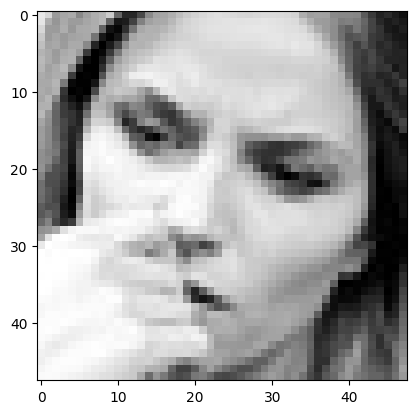

In [32]:
image = os.path.join(BASE_DIR, 'images', 'train', 'fear', '2.jpg')
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')